# Analise Exploratoria

Nesta análise exploratória de dados (EDA), iremos analisar um conjunto de dados relacionado a interações de clientes via chat. Este conjunto de dados inclui colunas para Intenção, Pergunta e Resposta. O objetivo é entender a natureza das interações, identificar padrões e preparar os dados para uma solução de chatbot destinada a aprimorar o atendimento ao cliente.


## Perguntas

1. Qual é a distribuição dos tipos de perguntas (dúvidas, problemas, solicitações) nas interações?

2. Como a complexidade das perguntas varia entre os diferentes exemplos na base de dados?

3. Quais são as respostas mais frequentemente dadas pelos atendentes?

4. Existe um padrão de respostas que estão sendo repetidas ou padronizadas?

5. Como a satisfação dos clientes pode estar relacionada ao tipo de resposta fornecida, com base nos exemplos?

6. Existem imagens sem texto de contexto como perguntas? Quando houver contexto, o quão completo ele é?

7. Existe uma correlação entre o tipo de pergunta e a necessidade de escalonamento para outros atendentes?

8. Existem muitos desvios da língua culta padrão? Eles afetam a compreensão do atendente?

9. Qual é a frequência de erros ortográficos nos chats, e como isso varia entre diferentes tipos de consultas?

10. Como os atendentes lidam com perguntas que contêm erros ortográficos? Eles corrigem ou solicitam esclarecimentos?

11. Como os erros ortográficos nas perguntas dos clientes afetam a compreensão por parte dos atendentes?

12. Qual é a frequência do uso de palavras em Japonês? Quais são as mais frequentes?

13. As palavras em japonês afetam a compreensão da pergunta?

14. Qual é a distribuição da quantidade de tokens por pergunta nas interações, e como isso pode influenciar o processamento de linguagem natural?

15. Qual é a frequência de caracteres especiais nas perguntas, e como isso pode influenciar o pré-processamento dos dados?

16. Emojis são usados nas perguntas? Se sim, com qual frequência?

17. Existe alguma tendência nas interações que sugira a necessidade de manipulação específica de tokens ou caracteres especiais?

18. Que tipos de problemas de tokenization podem ser antecipados com base nos erros ortográficos e na presença de caracteres especiais nas perguntas?

19. Há padrões nas interações que sugerem a necessidade de desenvolver técnicas específicas para lidar com frases complexas ou truncamento?

20. Quais são os temas mais recorrentes nas perguntas feitas pelos clientes na base de dados?



## Instalando pacotes necessários

In [1]:
!python -m spacy download pt_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 3.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [168]:
pip install pandas wordcloud matplotlib

In [3]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 53.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
!pip install seaborn matplotlib

## Importando bibliotecas

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
import seaborn as sns
nlp = spacy.load("pt_core_news_lg")

## Carregando Dataset

In [134]:
dataset_file = "chatsv2.csv"
df = pd.read_csv(dataset_file)
df.head()

,No,Intencao,Pergunta,Resposta\n
0,1,Como depositar,Boa dia.tudo bem?eu gostaria de saber sobre aq...,"Bom dia! Sim, o sr pode utilizar o cartão de d..."
1,2,Como fazer remessa,Como enviar dinheiro do Japão?,"Para se inscrever no serviço de remessa, por f..."
2,3,Tempo de remessa,Quanto tempo levará para o beneficiário recebe...,"Via de regra, as remessas serão pagas via PIX ..."
3,4,"Pedido de envio via metodo ""ByPhone""",Boa tarde\nAcabei de fazer a transferência de ...,iremos processar a sua solicitacao.\nMuito obr...
4,5,"Pedido de envio via metodo ""ByPhone""",Poderia fazer a remessa de 22yenes para o BBB ...,iremos processar a sua solicitacao.\nMuito obr...


### Removendo colunas vázias



In [135]:
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=0, how='all')
df.head()

,No,Intencao,Pergunta,Resposta\n
0,1,Como depositar,Boa dia.tudo bem?eu gostaria de saber sobre aq...,"Bom dia! Sim, o sr pode utilizar o cartão de d..."
1,2,Como fazer remessa,Como enviar dinheiro do Japão?,"Para se inscrever no serviço de remessa, por f..."
2,3,Tempo de remessa,Quanto tempo levará para o beneficiário recebe...,"Via de regra, as remessas serão pagas via PIX ..."
3,4,"Pedido de envio via metodo ""ByPhone""",Boa tarde\nAcabei de fazer a transferência de ...,iremos processar a sua solicitacao.\nMuito obr...
4,5,"Pedido de envio via metodo ""ByPhone""",Poderia fazer a remessa de 22yenes para o BBB ...,iremos processar a sua solicitacao.\nMuito obr...


In [136]:
df.tail()

,No,Intencao,Pergunta,Resposta\n
500,501,Atualizacao de dados cadastrais,Boa tarde como faço para fazer a mudança de en...,A senhora pode trocar pelo próprio app da Bras...
501,502,Tempo de entrega do cartao,Bom dia\nConsegui fazer depósito sem o cartão ...,Boa noite\nO sr solicitou dia 28. Será entregu...
502,503,Cancelamento,"Boa noite,a beneficiária me avisou que a conta...","Sim, podemos cancelar\nO valor voltará no seu ..."
503,504,Reembolso,"Boa noite\nEu fiz um depósito errado, era pra ...",É possível solicitar o reembolso diretamente d...
504,505,Problemas de remessa,"Ola, recebi uma ligação da central de vocês em...",Enviamos a correção ao nosso correspondente do...


## Visão Geral

## Número de Linhas e Categorias
Aqui, verificaremos o número total de entradas completas e a presença de dados faltantes, como uma resposta ausente. Isso ajuda a determinar a qualidade e a integridade do dataset.

In [137]:
df.count()

,0
No,505
Intencao,505
Pergunta,505
Resposta\n,504


## Descrição de Cada Coluna

 Descrição detalhada de cada coluna presente no dataset, como No, Intencao, Pergunta, e Resposta, explicando o tipo de dado contido em cada uma e seu propósito na análise.

- `No`: Define o índice da linha, começando a contagem em 1. Possui o tipo Inteiro.
- `Intencao`: Especifica a intenção por trás de uma pergunta. Por exemplo, "Como enviar dinheiro do Japão?" pode ser resumido pela intenção "Como fazer remessa". Possui tipo string e/ou categórico.
- `Pergunta`: A pergunta feita pelo cliente na conversa do chat. Tipo string.
- `Resposta`:  A resposta fornecida pelo operador da plataforma à pergunta de um cliente. Tipo string.

In [138]:
df.columns

Index(['No', 'Intencao', 'Pergunta', 'Resposta\n'], dtype='object')

## Palavras em outros *idiomas*

Analise das respostas para identificar palavras que não pertencem ao idioma português, utilizando o modelo de linguagem spaCy. Isso ajuda a detectar o uso de palavras estrangeiras que podem afetar a compreensão do atendente. Responde a pergunta 12 e 13

In [140]:
df_clean = df.copy()

df_clean.columns = df_clean.columns.str.strip()

df_clean['Resposta'] = df_clean['Resposta'].astype(str).fillna('')

non_portuguese_words_list = []

for text in df_clean['Resposta']:
    doc = nlp(text)
    non_portuguese_words = [token.text for token in doc if not token.is_stop and not token.is_punct and not token.has_vector]
    non_portuguese_words_list.append(non_portuguese_words)

df_resultado = pd.DataFrame({
    'palavras_fora_portugues': non_portuguese_words_list
})

print(df_resultado)


                               palavras_fora_portugues
0                                                   []
1    [Brastel, Remit, \n, Brastel, Remit, https://b...
2                                                   []
3                                                 [\n]
4                                                 [\n]
..                                                 ...
500                                      [Brastel, \n]
501                                           [\n, \n]
502                                      [\n, Brastel]
503                             [\n, \n, ￥750, \n, \n]
504                                     [\n, \n, \n\n]

[505 rows x 1 columns]


## Part-of-Speech tagging

Aplicação do Part-of-Speech tagging a uma frase selecionada para analisar a estrutura gramatical e entender a função de cada palavra na frase. Isso é crucial para o processamento de linguagem natural e a análise da intenção do cliente.

In [164]:
selected_sentence = df['Resposta\n'].iloc[1]

doc = nlp(selected_sentence)
print(f"Analysis of the sentence: '{selected_sentence}'")
for token in doc:
    print(f"Text: {token.text}, Lemma: {token.lemma_}, POS: {token.pos_}, Tag: {token.tag_}, Dep: {token.dep_}, Shape: {token.shape_}, Is Alpha: {token.is_alpha}, Is Stop: {token.is_stop}")

Analysis of the sentence: 'Para se inscrever no serviço de remessa, por favor, baixe o aplicativo Brastel Remit e registre todos os dados solicitados. Assim vamos validar sua inscrição e você já poderá registrar os seus beneficiários.
Com o app Brastel Remit você tera independência para fazer a remessa por conta propria e a qualquer horario https://brastelremit.jp/por/24h'
Text: Para, Lemma: para, POS: SCONJ, Tag: SCONJ, Dep: mark, Shape: Xxxx, Is Alpha: True, Is Stop: True
Text: se, Lemma: se, POS: PRON, Tag: PRON, Dep: expl, Shape: xx, Is Alpha: True, Is Stop: True
Text: inscrever, Lemma: inscrever, POS: VERB, Tag: VERB, Dep: advcl, Shape: xxxx, Is Alpha: True, Is Stop: False
Text: no, Lemma: em o, POS: ADP, Tag: ADP, Dep: case, Shape: xx, Is Alpha: True, Is Stop: True
Text: serviço, Lemma: serviço, POS: NOUN, Tag: NOUN, Dep: obl, Shape: xxxx, Is Alpha: True, Is Stop: False
Text: de, Lemma: de, POS: ADP, Tag: ADP, Dep: case, Shape: xx, Is Alpha: True, Is Stop: True
Text: remessa, Lem

## Respostas mais **comuns**

Contar as respostas mais comuns na coluna Resposta. Responde a pergunta 3 e 4

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12305 (\N{RIGHT BLACK LENTICULAR BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


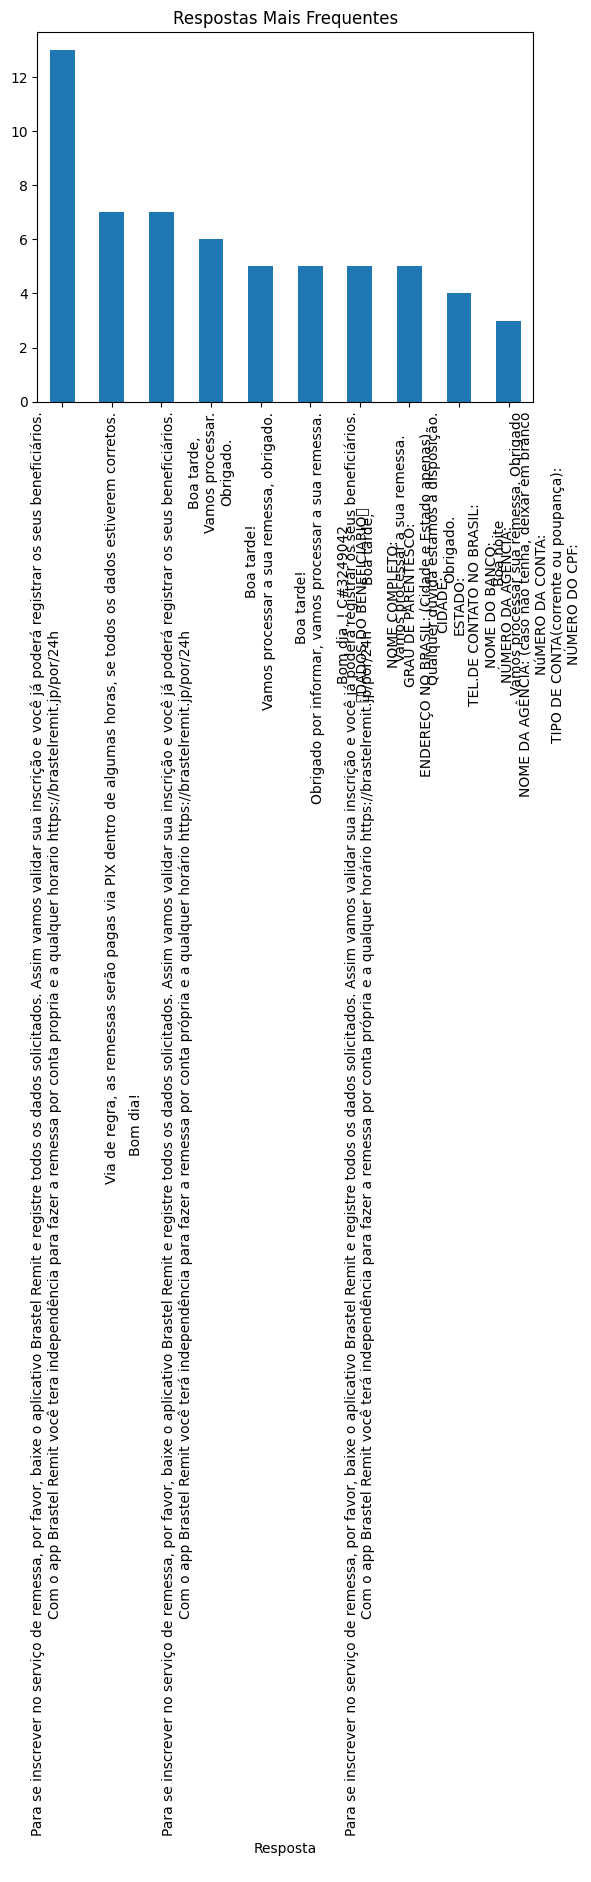

In [167]:
most_common_responses = df["Resposta\n"].value_counts().head(10)
most_common_responses.plot(kind='bar')
plt.title('Respostas Mais Frequentes')
plt.show()

## Resposta Ausente
Os dados ausentes aqui estão relacionados à resposta de uma intenção. Uma resposta elaborada pode ser adicionada com base em entradas semelhantes para a mesma intenção.

In [141]:
df[df.isnull().any(axis=1)]

,No,Intencao,Pergunta,Resposta\n
312,313,Confirmacao de cambio/taxas,10 mil da quanto la no brasil,NaN


## Categorias
Múltiplas perguntas podem fornecer diferentes maneiras de abordar a mesma intenção. Um conjunto de 18 diferentes intenções é definido no conjunto de dados.
- 'Como depositar'
- 'Como fazer remessa'
- 'Tempo de remessa'
- 'Pedido de envio via metodo "ByPhone"'
- 'Como se inscrever'
- 'Confirmacao de cambio/taxas'
- 'Envio via Deposit Code'
- 'Registro/Atualizacao de Documento',
- 'Solicitacao de cartao de remessas'
- 'Cadastro de beneficiario',
- 'Acesso a conta'
- 'Termos e condicoes do servico'
- 'Problemas de remessa'
- 'Tempo de entrega do cartao'
- 'Reembolso'
- 'Regras do servico'
- 'Atualizacao de dados cadastrais'
- 'Cancelamento'

In [142]:
df["Intencao"].nunique()

18

In [143]:
df["Intencao"].unique()

array(['Como depositar', 'Como fazer remessa', 'Tempo de remessa',
       'Pedido de envio via metodo "ByPhone"', 'Como se inscrever',
       'Confirmacao de cambio/taxas', 'Envio via Deposit Code',
       'Registro/Atualizacao de Documento',
       'Solicitacao de cartao de remessas', 'Cadastro de beneficiario',
       'Acesso a conta', 'Termos e condicoes do servico',
       'Problemas de remessa', 'Tempo de entrega do cartao', 'Reembolso',
       'Regras do servico', 'Atualizacao de dados cadastrais',
       'Cancelamento'], dtype=object)

O número de entradas por intenção varia entre as categorias. "Confirmação de câmbio/taxas" tem o maior número de respostas, em contraste com a categoria "Regras do serviço".

<Axes: xlabel='Intencao'>

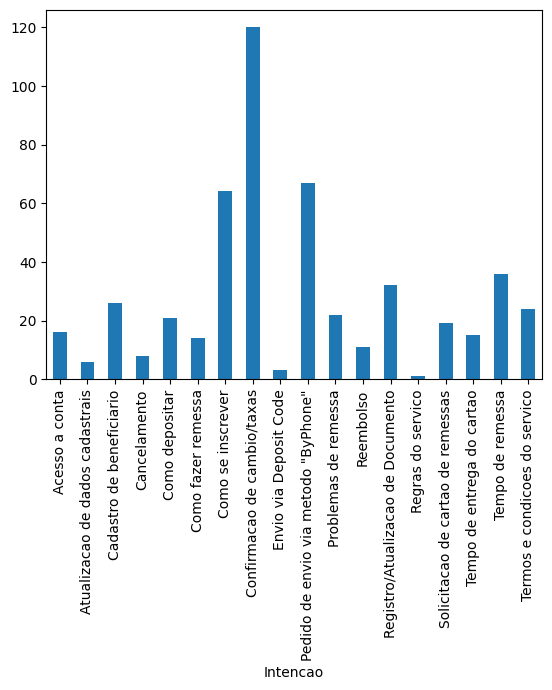

In [144]:
grouped_by_category = df.groupby("Intencao").size()
grouped_by_category.plot(kind="bar")

## Tokenização


Tokenização do texto das perguntas e respostas, segmentando as frases em palavras individuais, lemmas, e entidades reconhecidas, para posterior análise e processamento de linguagem natural.

In [145]:
nlp = spacy.load("pt_core_news_lg")

def preprocess_and_tokenize(text):
    text = text.strip().replace('\n', ' ')
    text = text.lower()
    doc = nlp(text)

    tokens = []
    lemmas = []
    entities = []

    for token in doc:
        if not token.is_punct and not token.is_stop:
            tokens.append(token.text)
            lemmas.append(token.lemma_)

            entity = None

            if token.ent_type_:
                entity = token.ent_type_

            entities.append(entity)

    return tokens, lemmas, entities

intention_tokens_quest_dict = {
    "intention":[],
    "token":[],
    "lemma":[],
    "entities":[]
}

intention_tokens_answer_dict = {
    "intention":[],
    "token":[],
    "lemma":[],
    "entities":[]
}

### Preenchendo os dataframes

In [146]:
for idx, row in df.iterrows():
  intention = row["Intencao"]
  quest_tokens, quest_lemmas, quest_entities = preprocess_and_tokenize(str(row["Pergunta"]))
  intention_tokens_quest_dict["intention"].extend([intention for i in range(len(quest_tokens))])
  intention_tokens_quest_dict["token"].extend(list(quest_tokens))
  intention_tokens_quest_dict["lemma"].extend(list(quest_lemmas))
  intention_tokens_quest_dict["entities"].extend(list(quest_entities))

  answ_tokens,  answ_lemmas, answ_entities = preprocess_and_tokenize(str(row["Resposta\n"]))
  intention_tokens_answer_dict["intention"].extend([intention for i in range(len(answ_tokens))])
  intention_tokens_answer_dict["token"].extend(list(answ_tokens))
  intention_tokens_answer_dict["lemma"].extend(list(answ_lemmas))
  intention_tokens_answer_dict["entities"].extend(list(answ_entities))


### Quantidade de tokens por pergunta

Medir a complexidade das perguntas através do número de tokens ou entidades presentes nas perguntas. Responde a segunda pergunta.

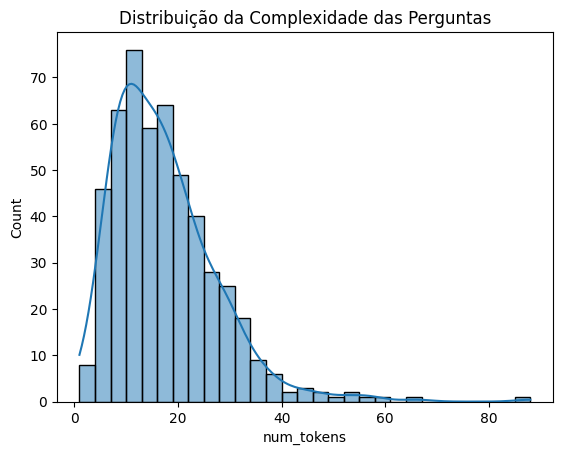

In [165]:
df['num_tokens'] = df['Pergunta'].apply(lambda x: len(nlp(x)))
sns.histplot(df['num_tokens'], kde=True)
plt.title('Distribuição da Complexidade das Perguntas')
plt.show()

## Análise Perguntas e respostas

Neste tópico, analisamos os DataFrames preenchidos, utilizando visualizações e estatísticas descritivas para explorar os padrões de tokens e entidades nas perguntas e resp

In [147]:
token_question_df = pd.DataFrame.from_dict(intention_tokens_quest_dict)
token_answer_df = pd.DataFrame.from_dict(intention_tokens_answer_dict)

### Nuvem de palavras

Geramos uma nuvem de palavras para visualizar os tokens mais frequentes nas perguntas, o que ajuda a identificar os principais temas e termos recorrentes nas interações dos clientes.

#### Perguntas

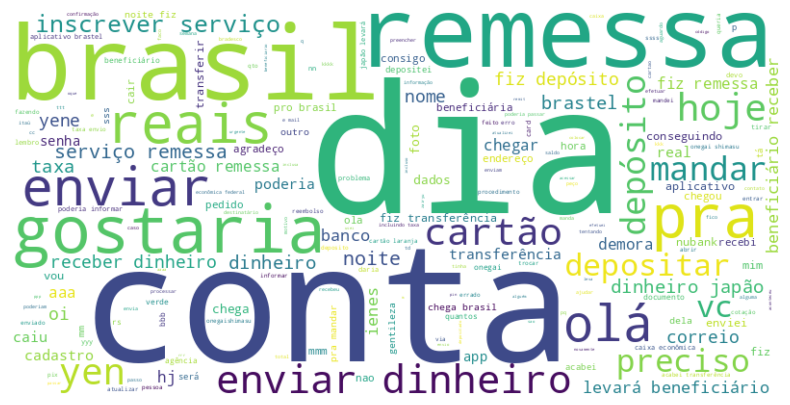

In [148]:
completed_text = ' '.join(intention_tokens_quest_dict['token'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(completed_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#### Respostas

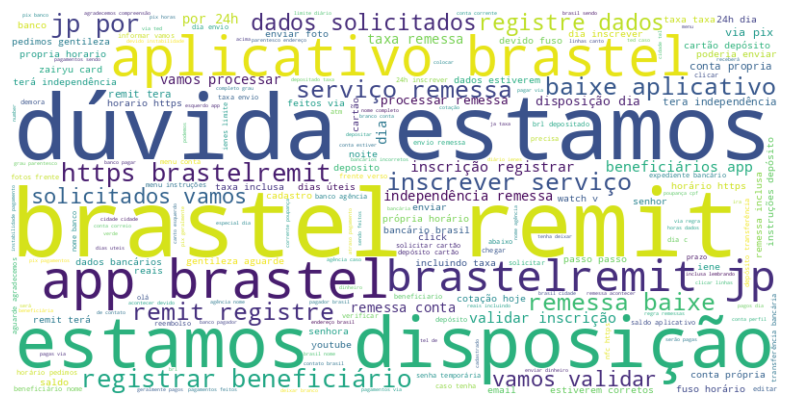

In [149]:
completed_text = ' '.join(intention_tokens_answer_dict['token'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(completed_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Perguntas

In [150]:
# Tokens únicos
token_question_df["token"].nunique()

985

#### Distribuição de tokens por intenção  nas perguntas

Contagem do número de tokens únicos presentes nas perguntas, o que oferece uma visão da diversidade linguística nas interações dos clientes. Responde a pergunta 14

<Axes: xlabel='intention'>

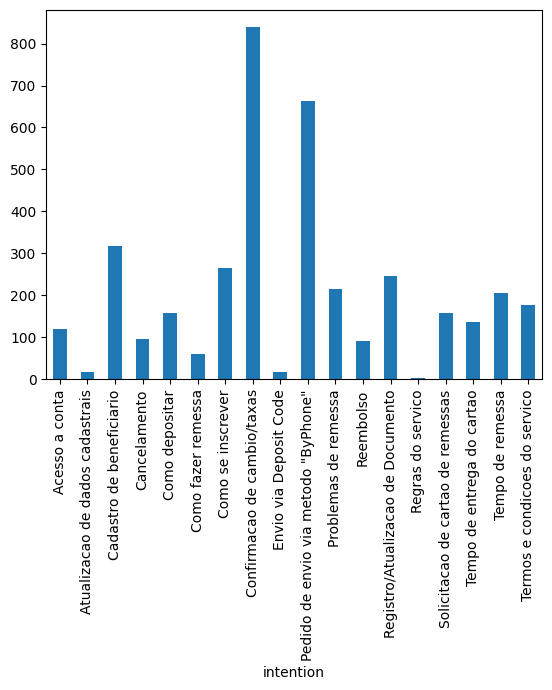

In [151]:
tokens_grouped_by_category_quest = token_question_df.groupby("intention").size()
tokens_grouped_by_category_quest.plot(kind="bar")

#### Relevância de Tokens  nas perguntas

Analise da relevância de tokens dentro de cada intenção, identificando os tokens mais comuns e relevantes que aparecem nas perguntas dos clientes.

In [153]:
token_intention_counts_quest = token_question_df.groupby(['intention', 'token']).size().reset_index(name='count')
token_intention_counts_quest = token_intention_counts_quest.sort_values(['intention', 'count'], ascending=[True, False])
print(token_intention_counts_quest)

                          intention        token  count
61                   Acesso a conta        senha     12
24                   Acesso a conta        conta      5
22                   Acesso a conta  conseguindo      4
23                   Acesso a conta      consigo      4
25                   Acesso a conta          dia      4
...                             ...          ...    ...
1764  Termos e condicoes do servico         usei      1
1766  Termos e condicoes do servico    venezuela      1
1767  Termos e condicoes do servico       vietnã      1
1770  Termos e condicoes do servico        índia      1
1771  Termos e condicoes do servico       última      1

[1772 rows x 3 columns]


#### Top 10 Tokens  nas perguntas



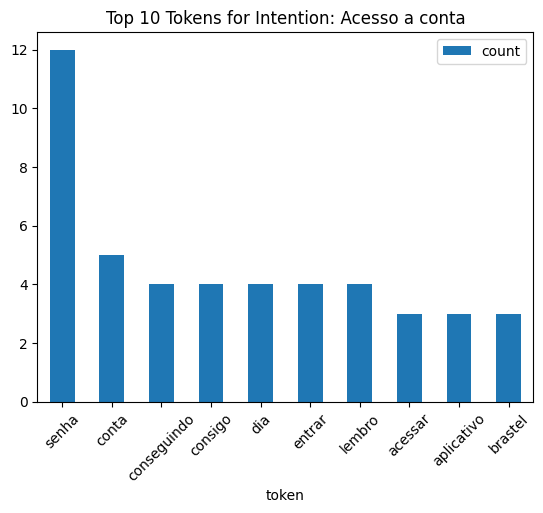

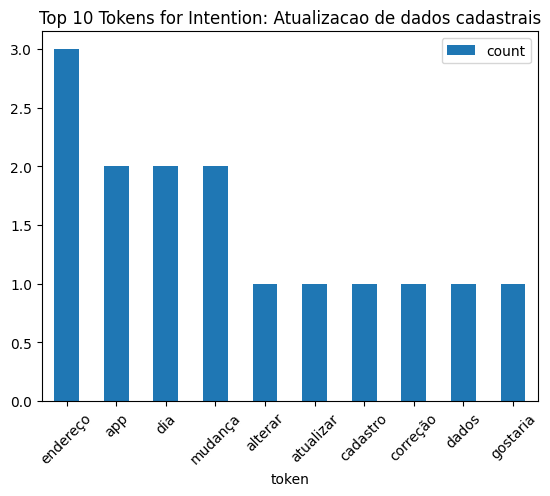

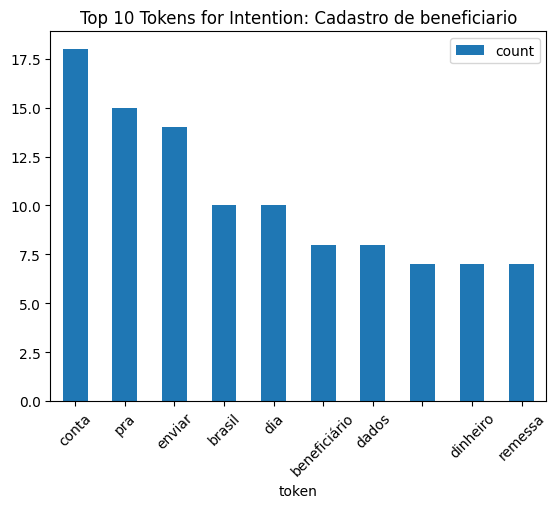

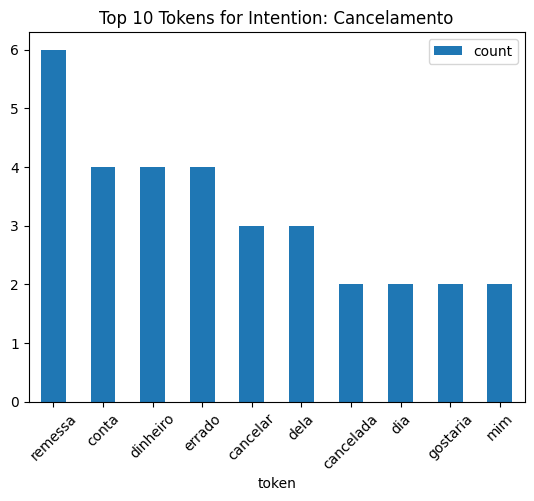

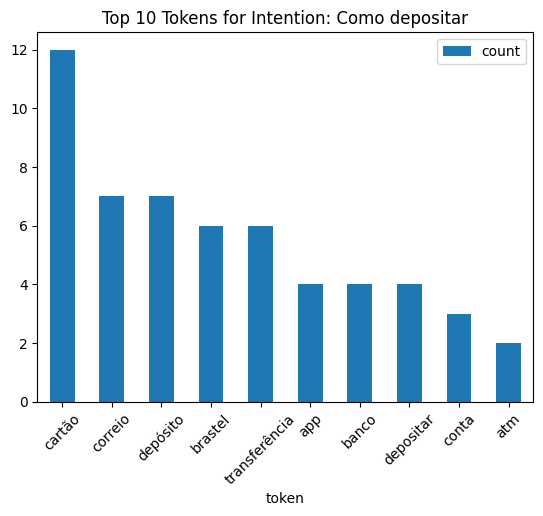

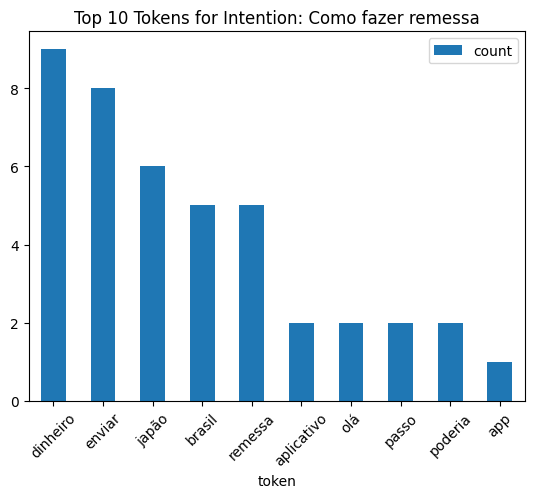

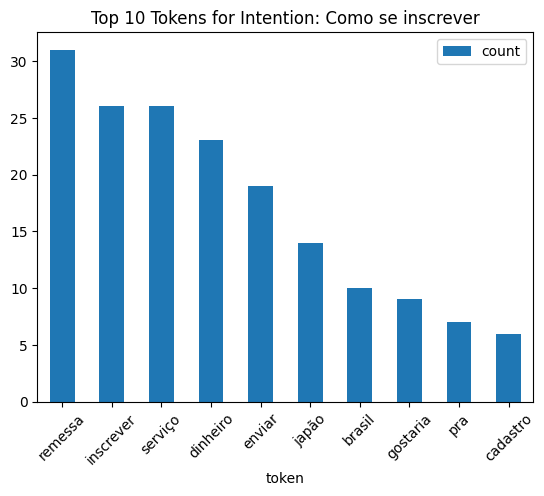

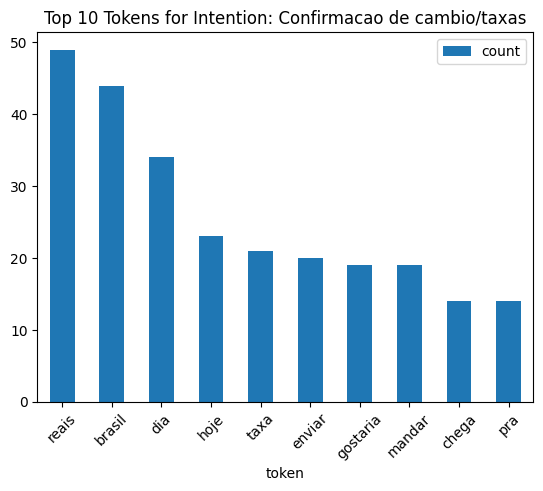

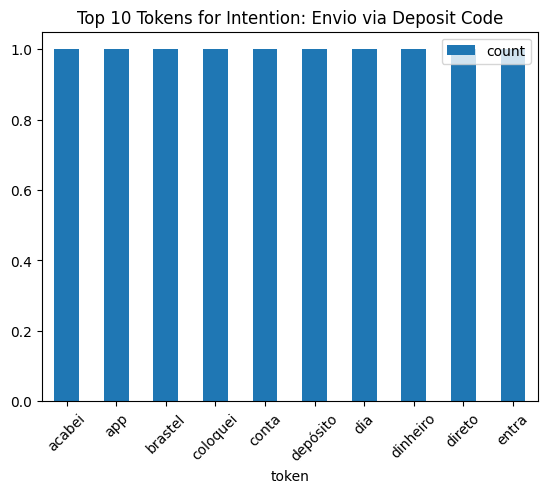

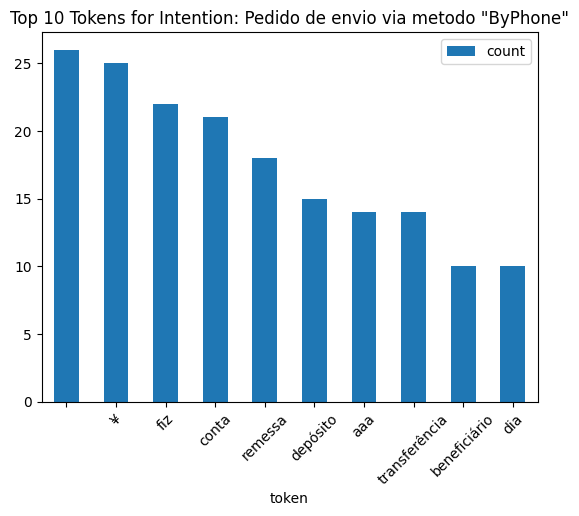

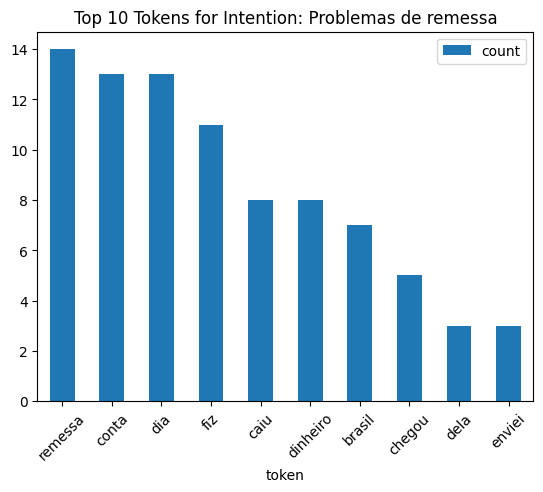

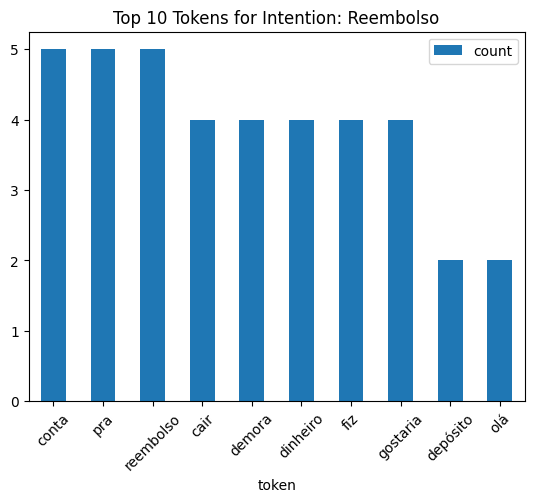

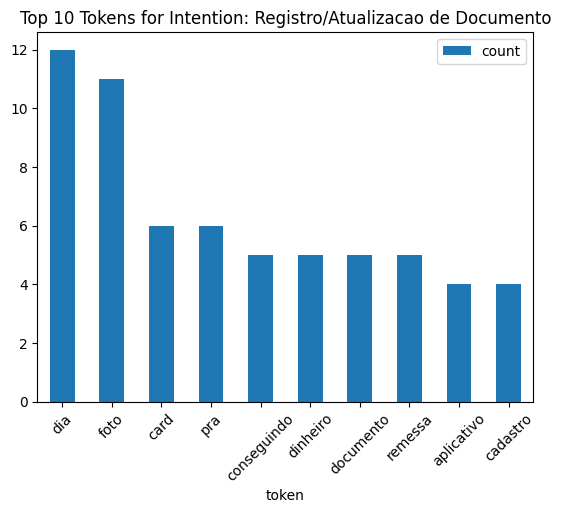

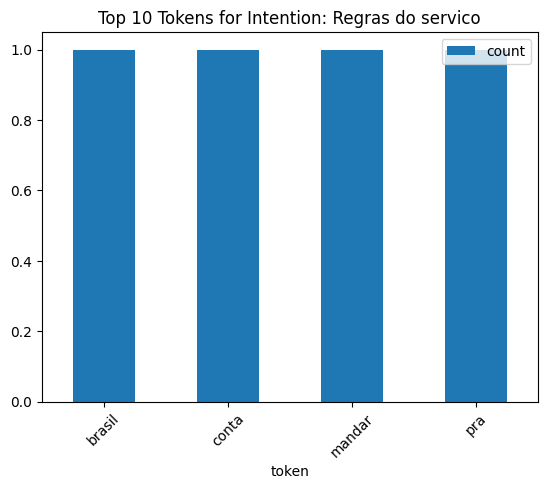

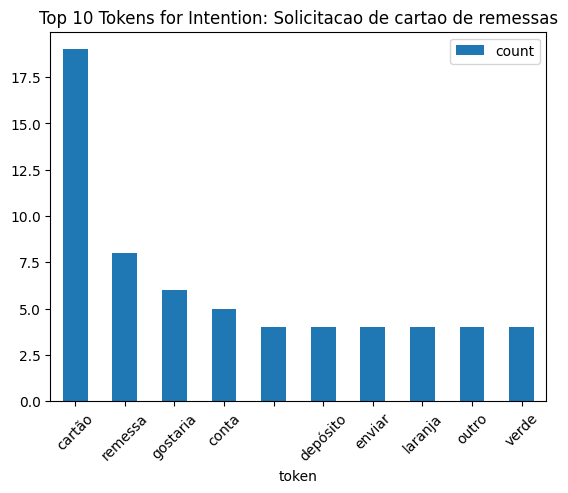

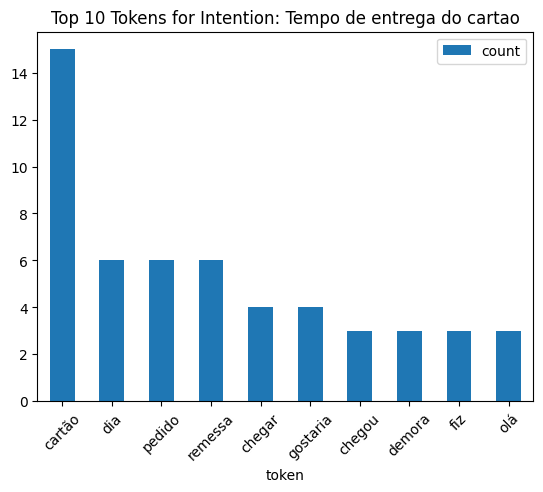

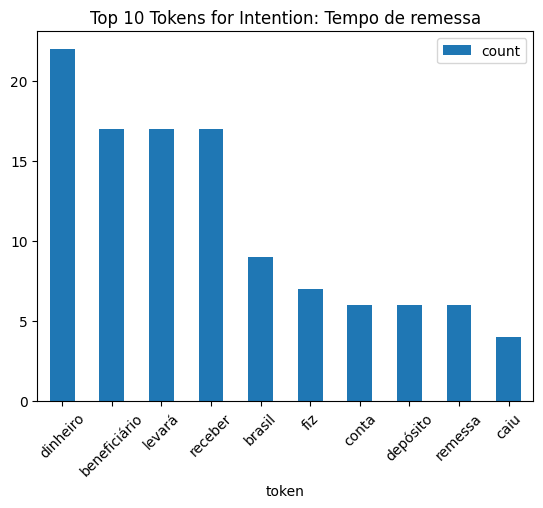

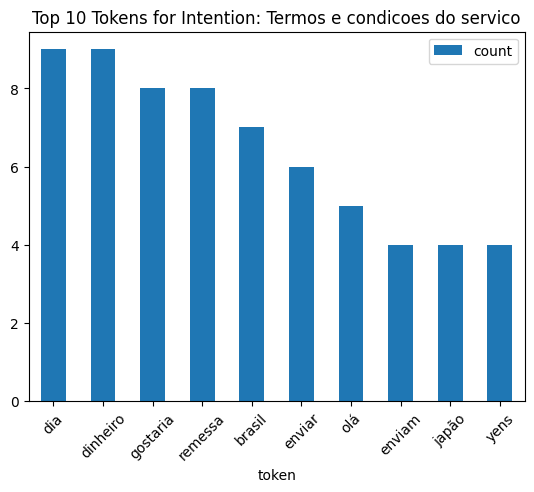

In [154]:
top_n = 10

for intention in token_intention_counts_quest['intention'].unique():
    top_tokens = token_intention_counts_quest[token_intention_counts_quest['intention'] == intention].head(top_n)
    top_tokens.plot(kind='bar', x='token', y='count', title=f'Top {top_n} Tokens for Intention: {intention}')
    plt.xticks(rotation=45)
    plt.show()

#### Distribuição de Entidades  nas perguntas

Visualização da distribuição de entidades nomeadas por intenção, destacando as intenções que frequentemente envolvem termos específicos ou entidades reconhecidas. Esta seção responde a primeira pergunta, sendo "Confirmação de câmbio/taxas" a entidade mais citada.

Relevância de Entidade

In [157]:
entity_question_df = token_question_df[token_question_df['entities'].notna()]
entity_question_df['entity'] = entity_question_df['entities']

<ipython-input-157-0920455277a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entity_question_df['entity'] = entity_question_df['entities']


In [158]:
value_counts = entity_question_df['entities'].value_counts()

print("Quantidade de entidades para cada celula:")
print(value_counts)

Quantidade de entidades para cada celula:
entities
LOC     221
PER     165
MISC     53
ORG      28
Name: count, dtype: int64


Agrupado por token

In [163]:
token_entity_counts_quest = entity_question_df.groupby(['entity', 'token']).size().reset_index(name='count')
token_entity_counts_quest = token_entity_counts_quest.sort_values(['entity', 'count'], ascending=[True, False])
print(token_entity_counts_quest)

    entity   token  count
8      LOC  brasil    101
21     LOC   japão     27
22     LOC   noite     20
15     LOC     dia      7
44     LOC     vcs      5
..     ...     ...    ...
185    PER   zaryo      1
186    PER   zaryu      1
187    PER   zayro      1
188    PER   zayru      1
189    PER       💴      1

[190 rows x 3 columns]


Entidades por intenção

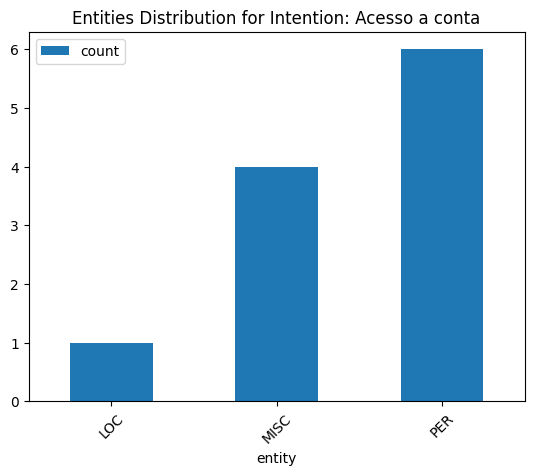

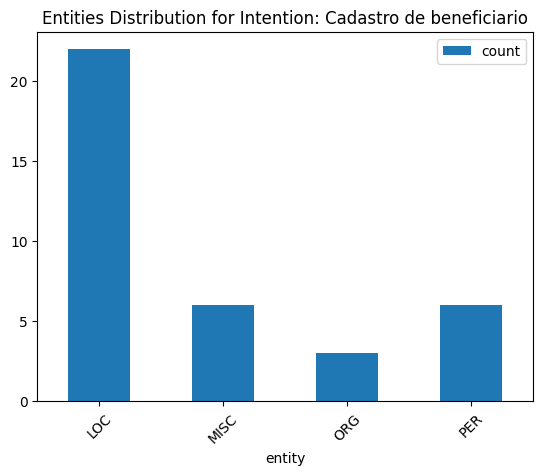

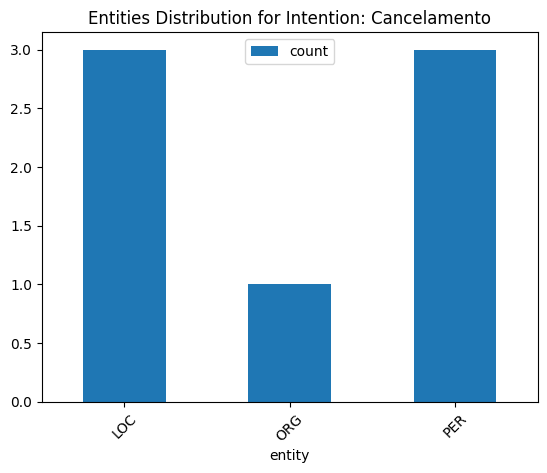

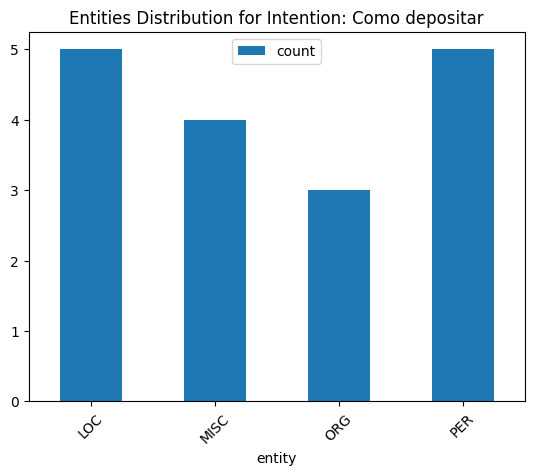

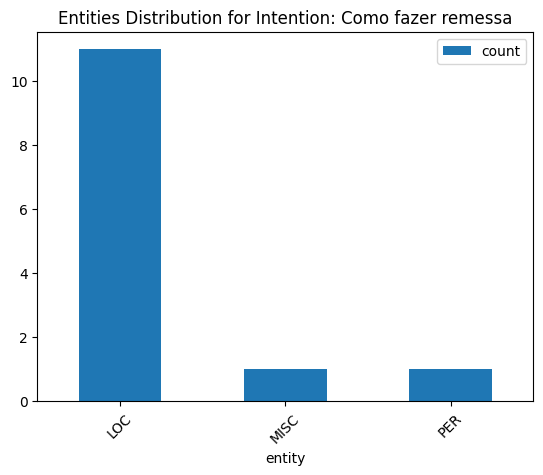

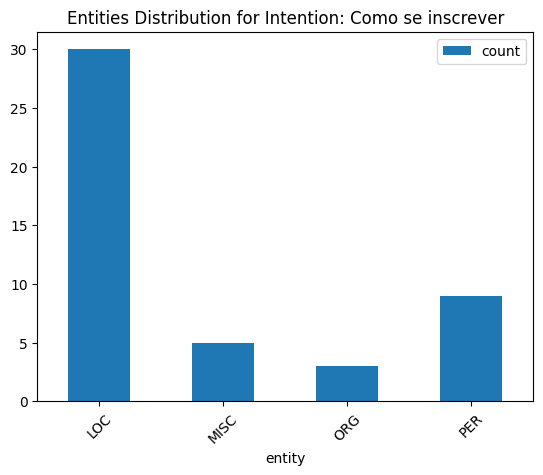

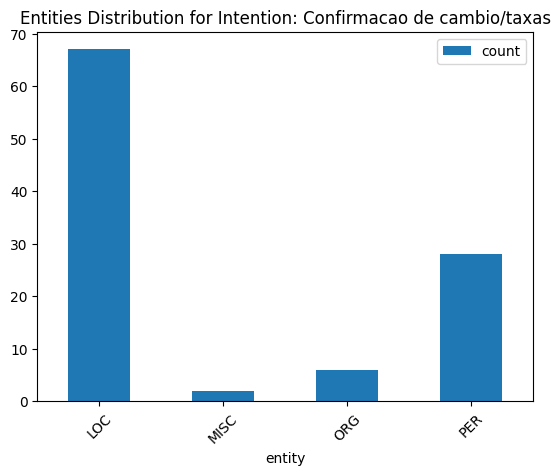

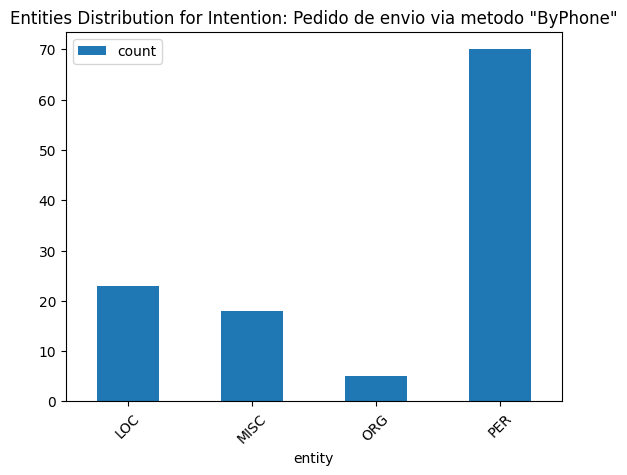

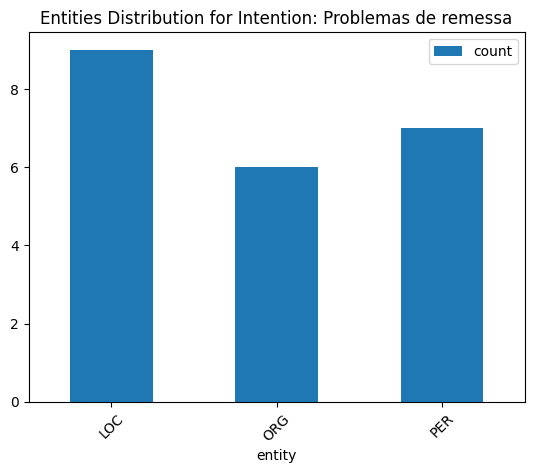

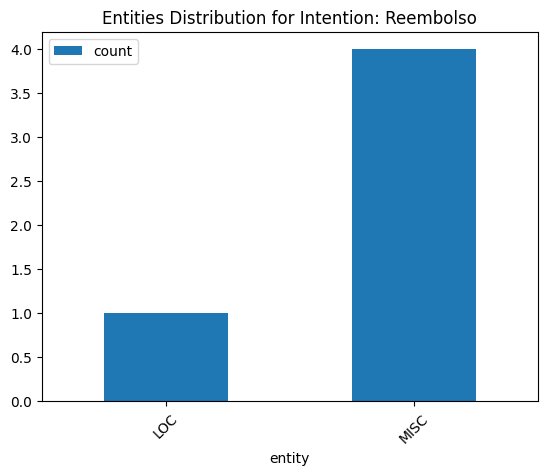

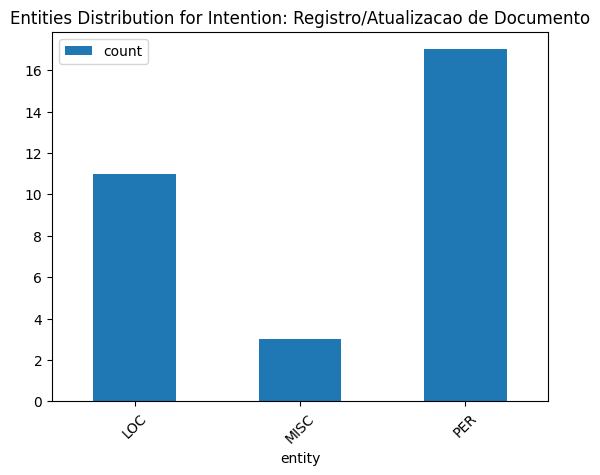

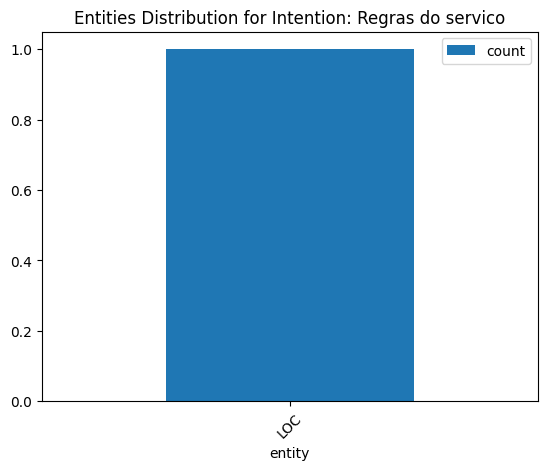

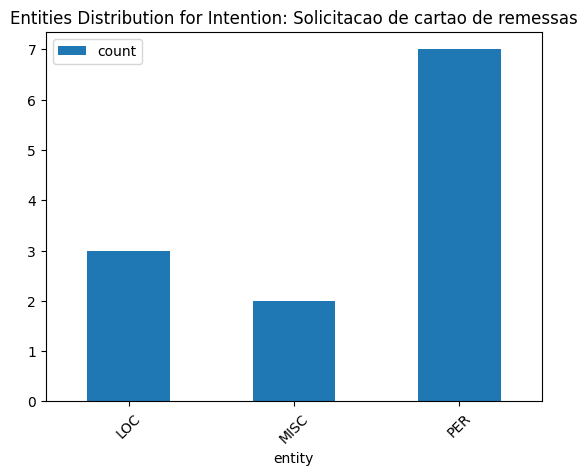

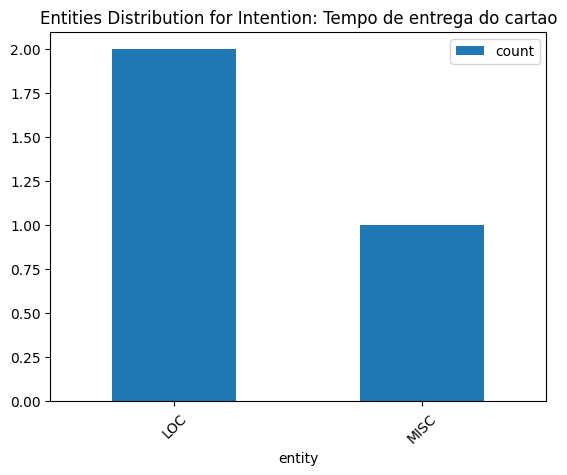

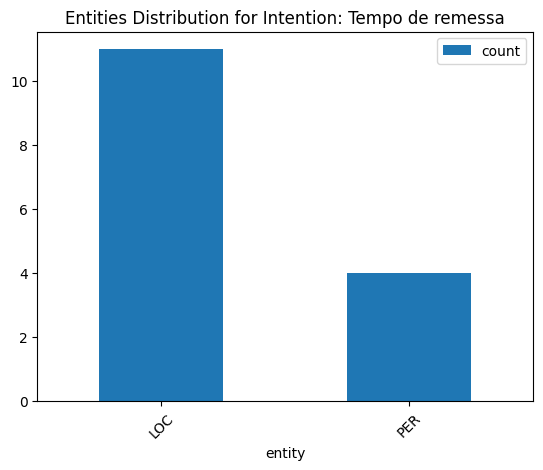

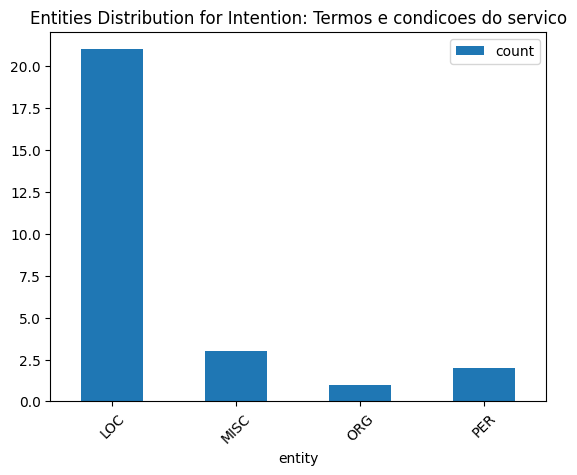

In [159]:
entity_intention_counts_quest = entity_question_df.groupby(['intention', 'entity']).size().reset_index(name='count')

for intention in entity_intention_counts_quest['intention'].unique():
    top_entities = entity_intention_counts_quest[entity_intention_counts_quest['intention'] == intention]
    top_entities.plot(kind='bar', x='entity', y='count', title=f'Entities Distribution for Intention: {intention}')
    plt.xticks(rotation=45)
    plt.show()

#### Entidades por Intenção  nas perguntas

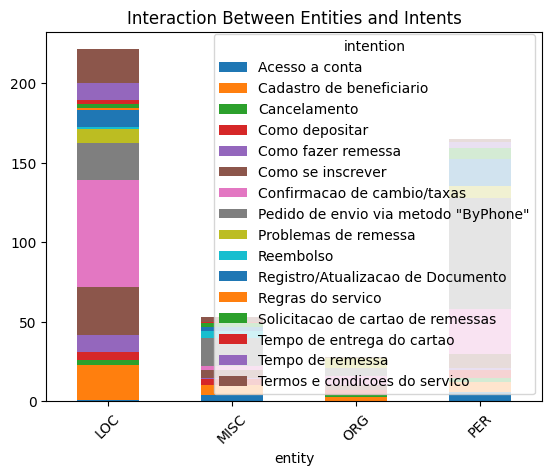

In [28]:
entity_intent_quest_ct = pd.crosstab(entity_question_df['entity'], entity_question_df['intention'])
entity_intent_quest_ct.plot(kind='bar', stacked=True, rot=45)
plt.title('Interaction Between Entities and Intents')
plt.show()

### Respostas

In [29]:
# Tokens únicos
token_answer_df["token"].nunique()

1085

#### Distribuição de Tokens por Intenção nas Respostas

Responde a pergunta 14

<Axes: xlabel='intention'>

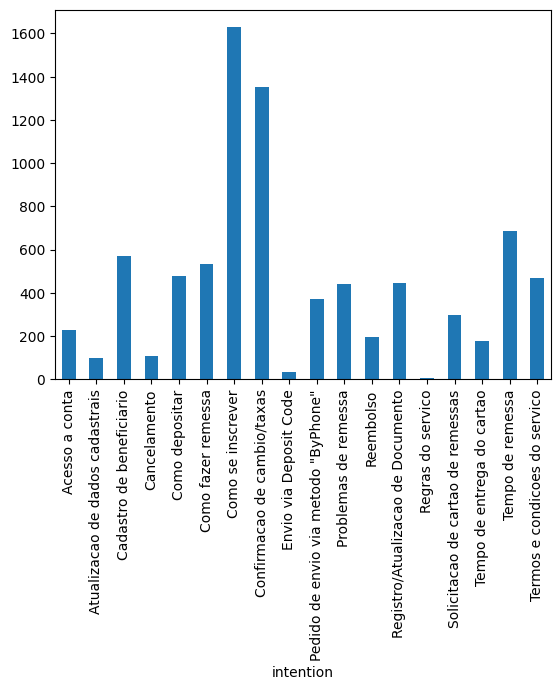

In [30]:
tokens_grouped_by_category_answ = token_answer_df.groupby("intention").size()
tokens_grouped_by_category_answ.plot(kind="bar")

#### Relevância de Tokens nas respostas

In [31]:
token_intention_counts_answ = token_answer_df.groupby(['intention', 'token']).size().reset_index(name='count')
token_intention_counts_answ = token_intention_counts_answ.sort_values(['intention', 'count'], ascending=[True, False])

#### Top 10 Tokens nas respostas


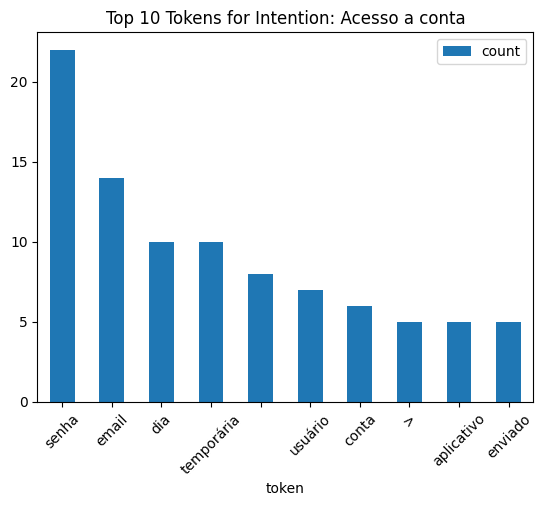

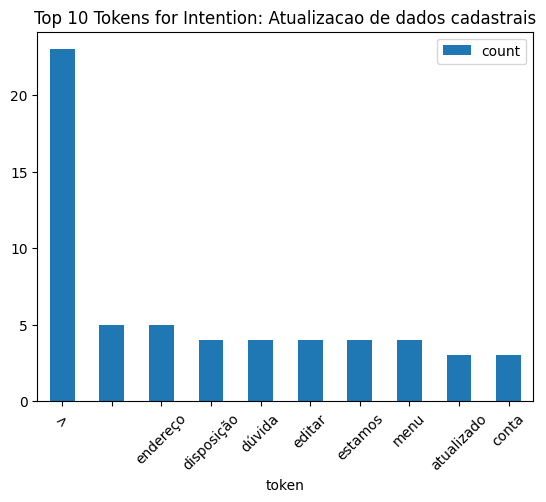

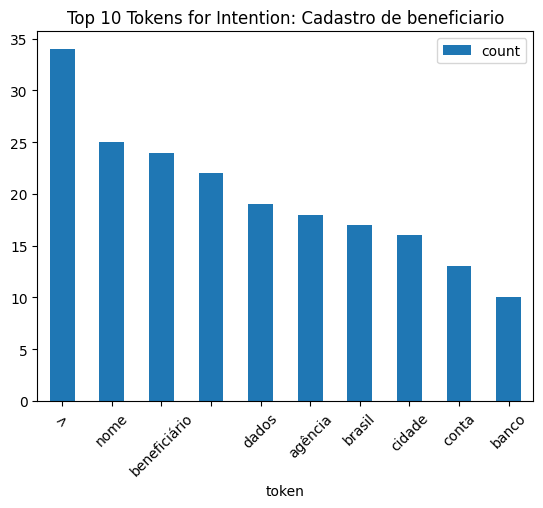

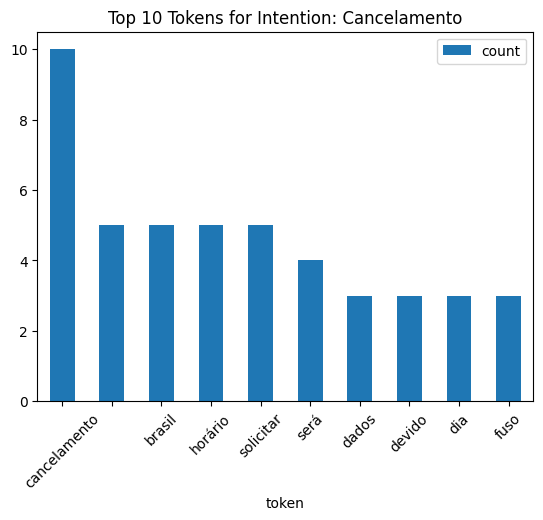

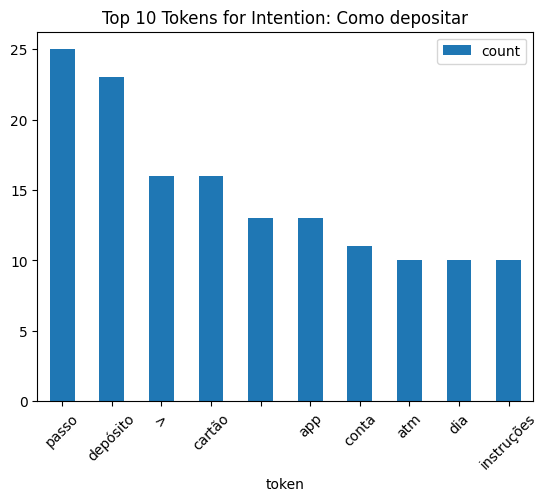

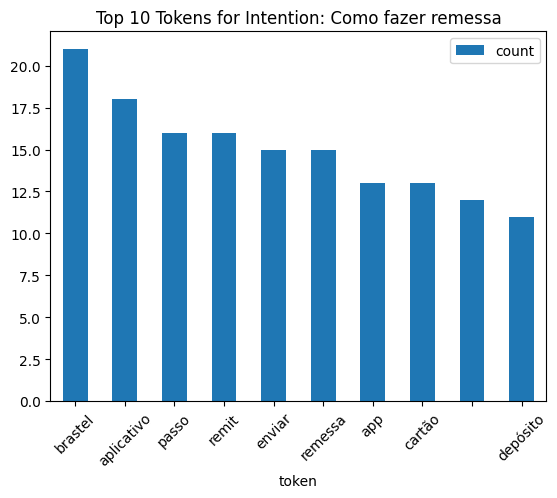

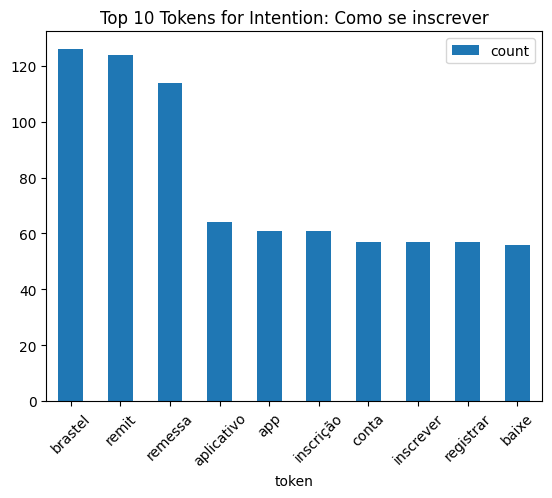

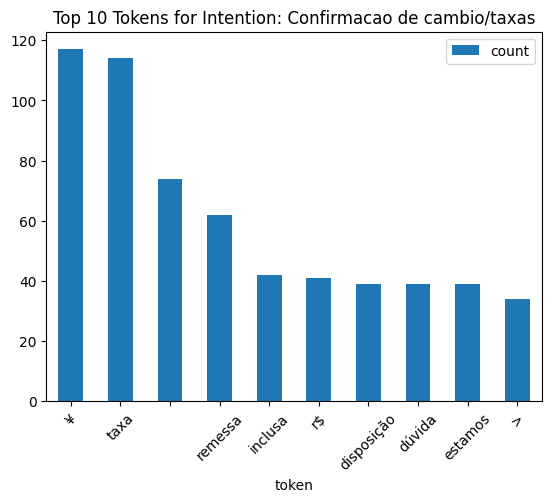

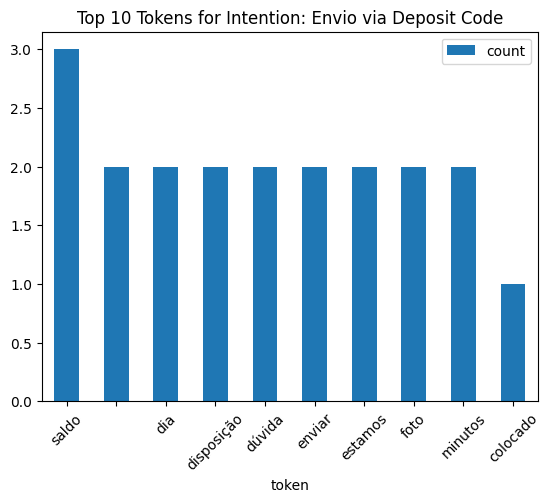

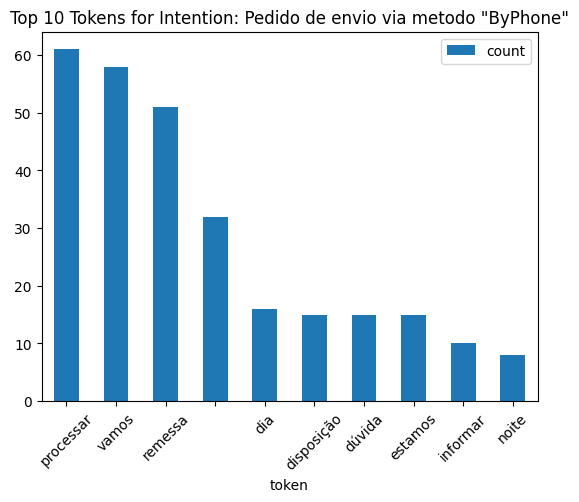

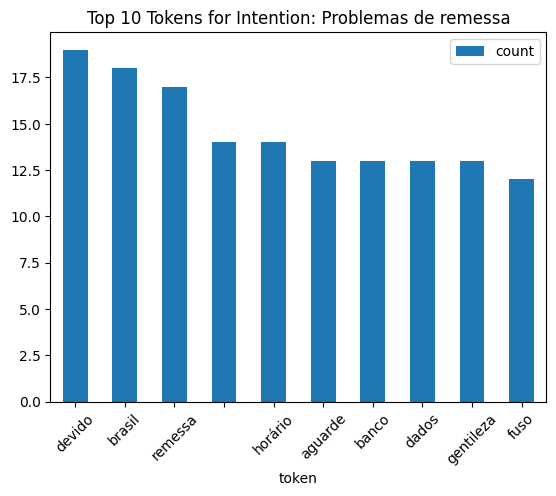

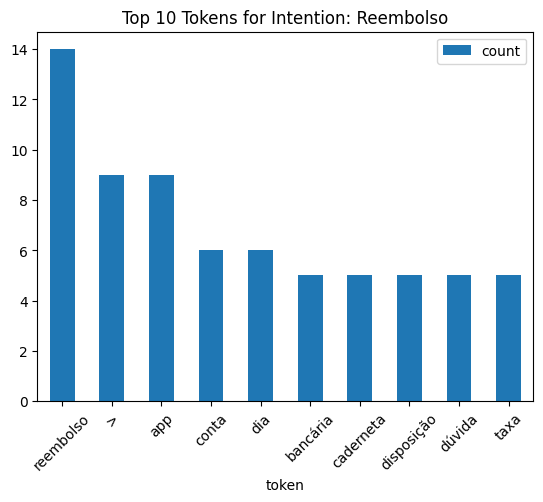

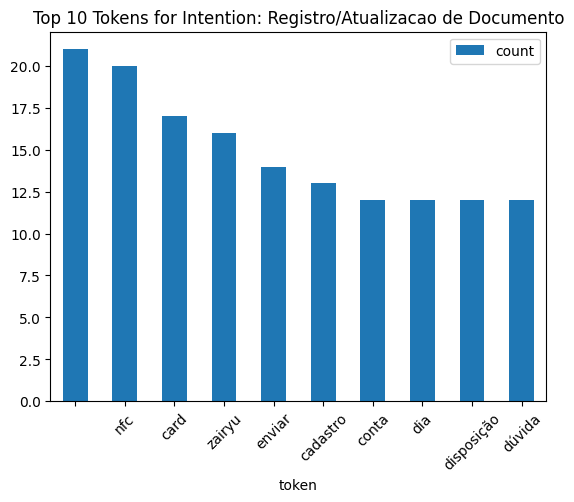

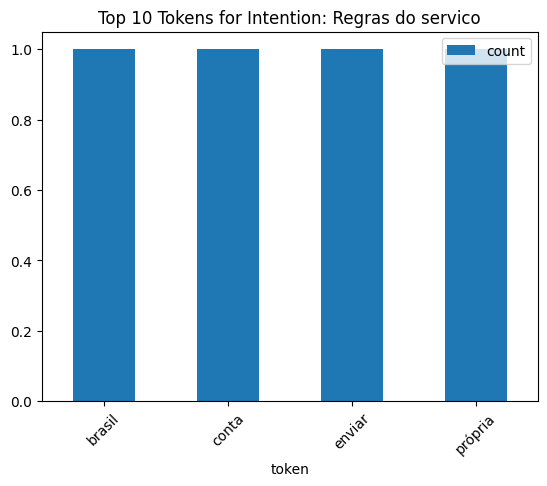

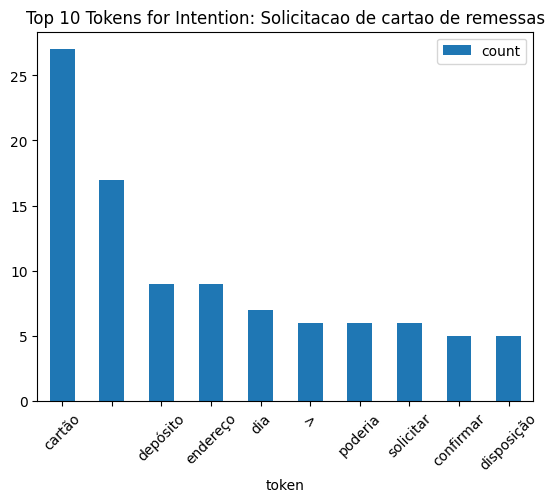

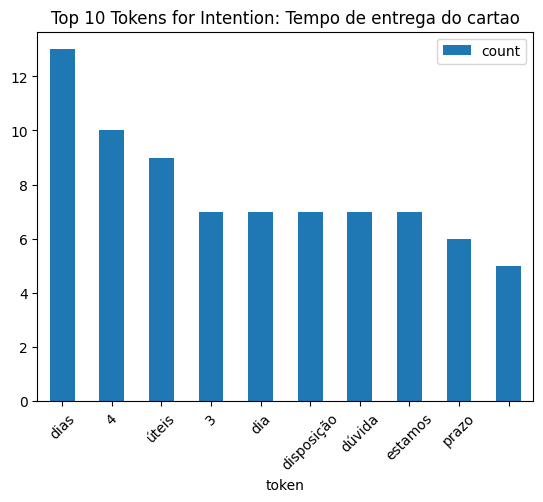

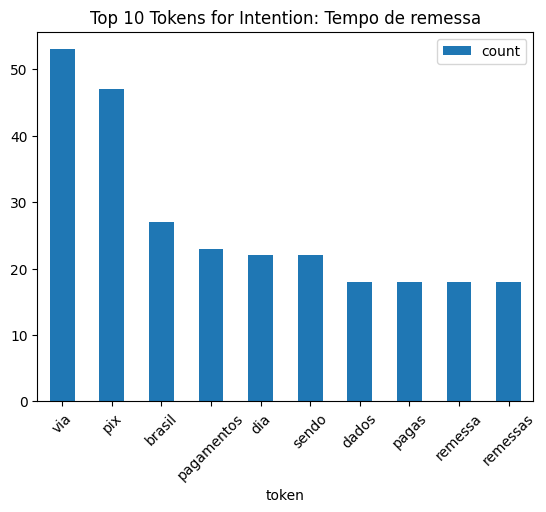

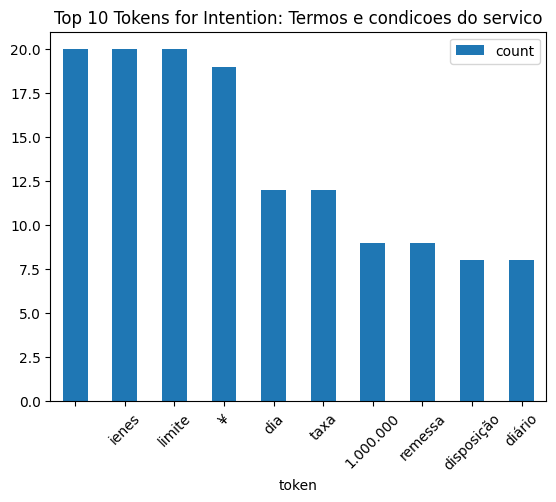

In [32]:
top_n = 10

for intention in token_intention_counts_answ['intention'].unique():
    top_tokens = token_intention_counts_answ[token_intention_counts_answ['intention'] == intention].head(top_n)
    top_tokens.plot(kind='bar', x='token', y='count', title=f'Top {top_n} Tokens for Intention: {intention}')
    plt.xticks(rotation=45)
    plt.show()

#### Distribuição de Entidades nas respostas

 Como as entidades nomeadas são distribuídas nas respostas, o que pode fornecer insights sobre como os atendentes lidam com termos importantes ou específicos ao responder as perguntas.

<ipython-input-33-e01b9b83ce2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entity_answer_df['entity'] = entity_answer_df['entities']


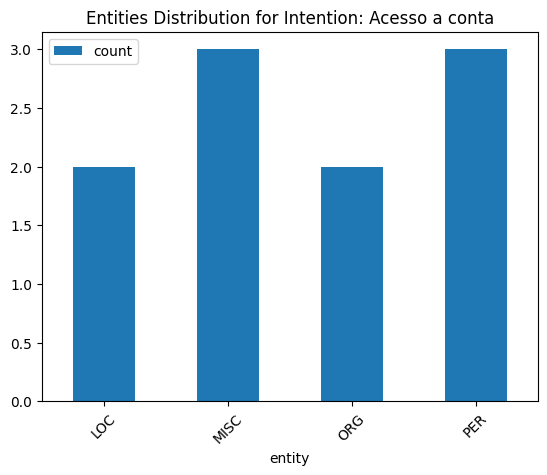

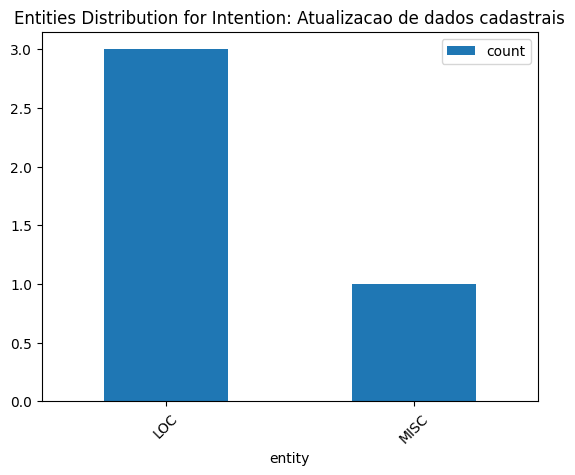

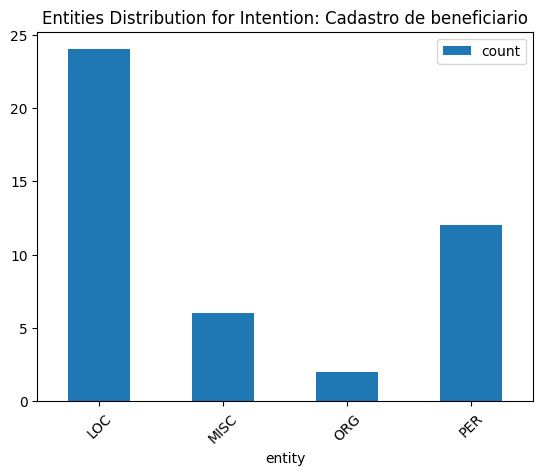

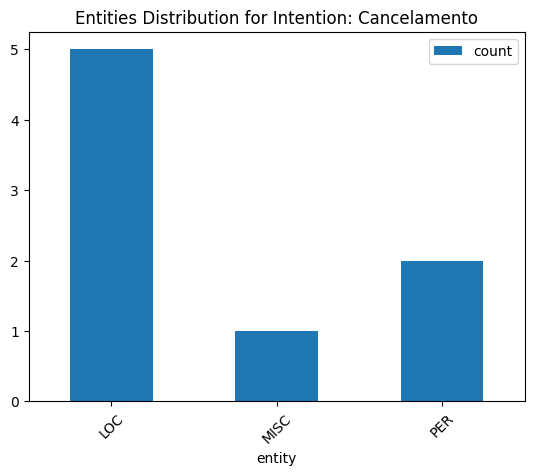

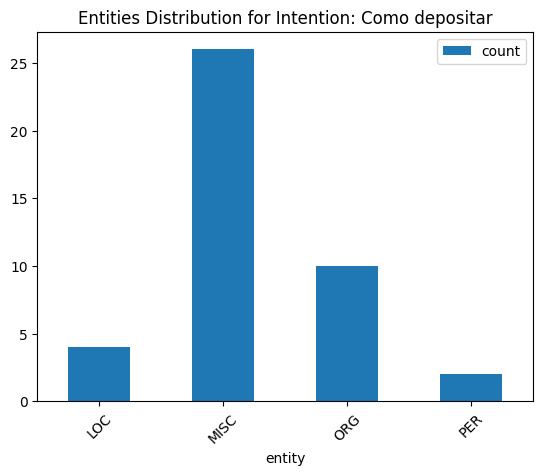

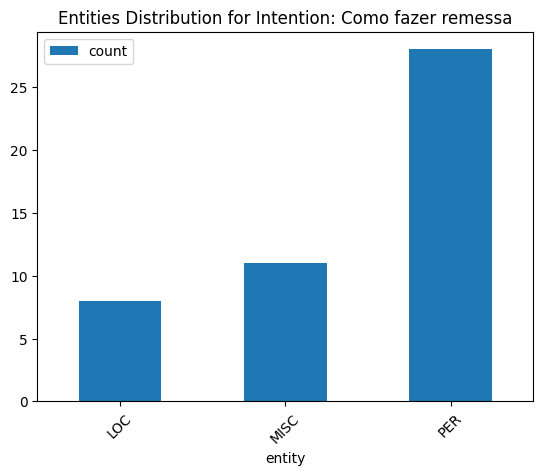

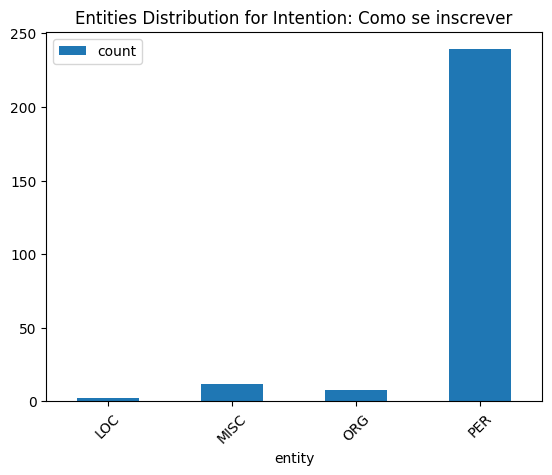

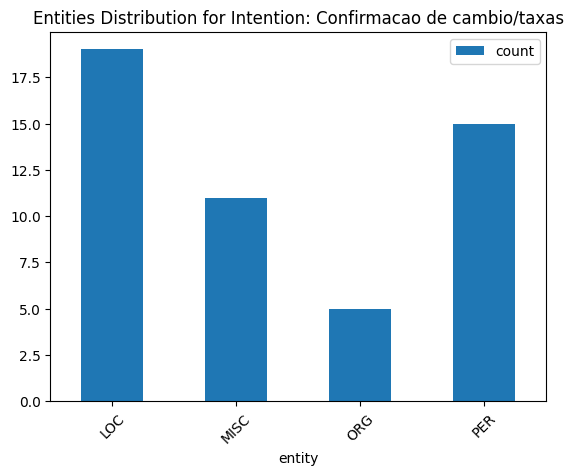

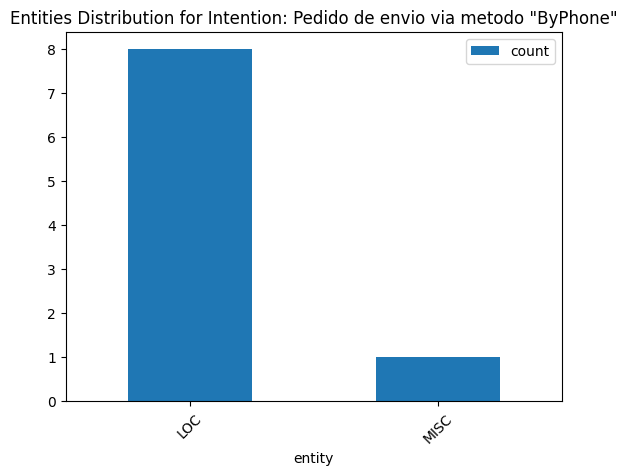

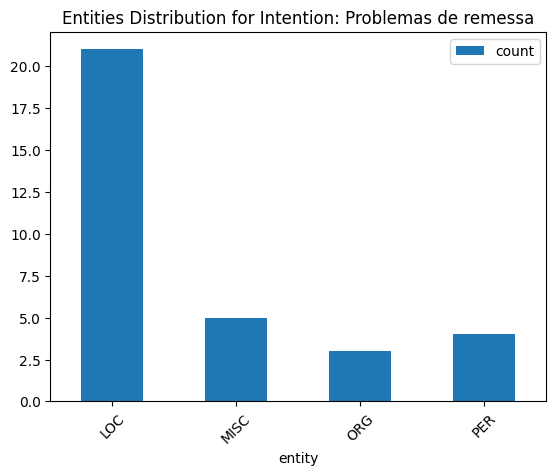

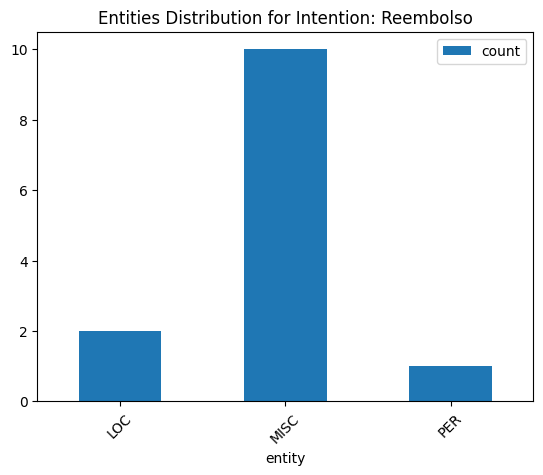

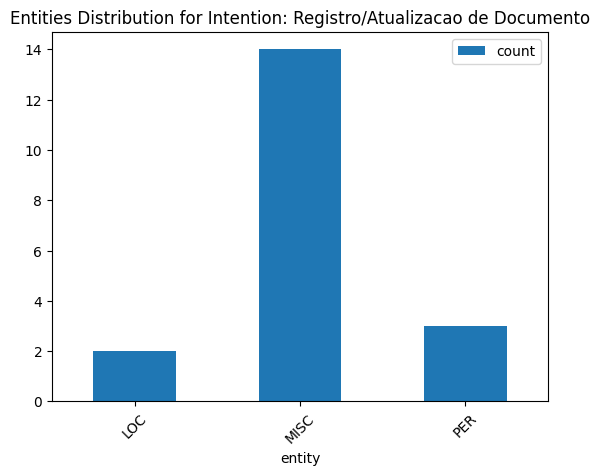

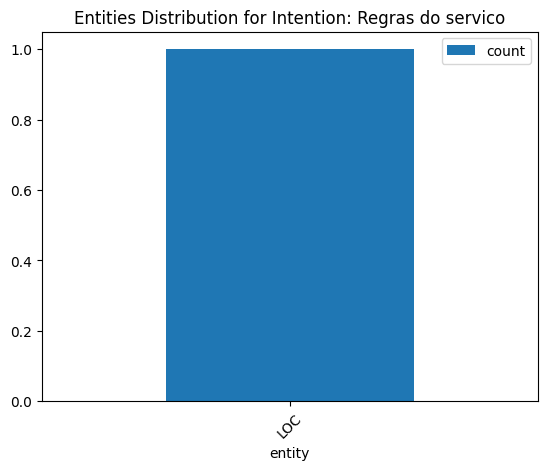

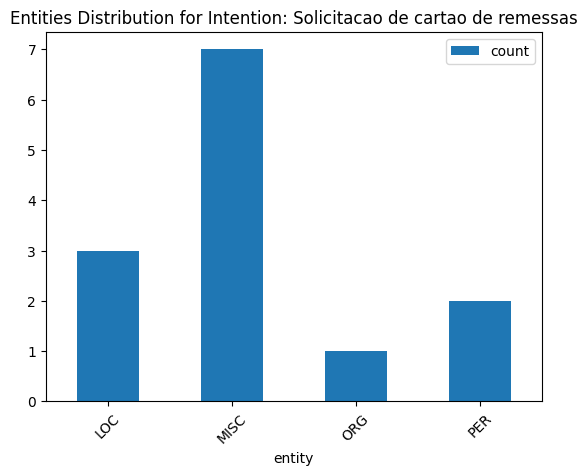

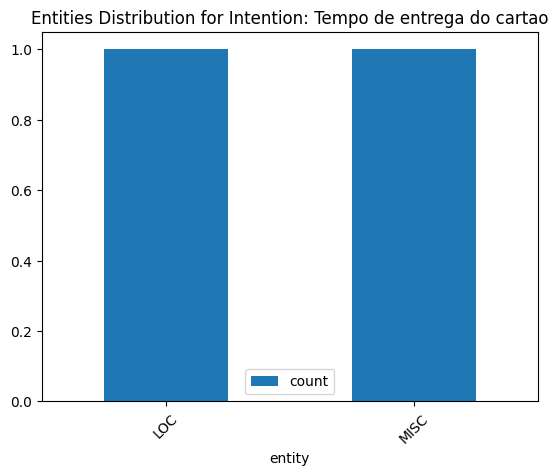

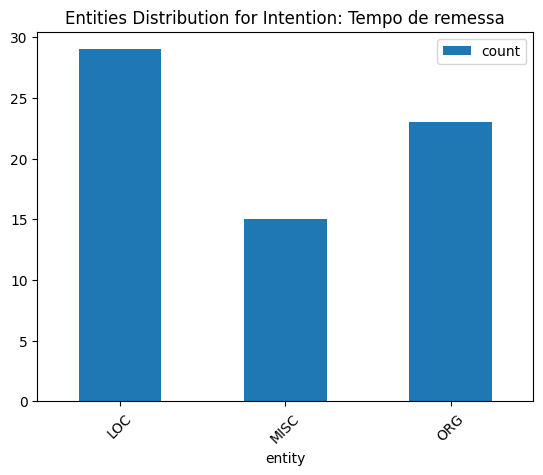

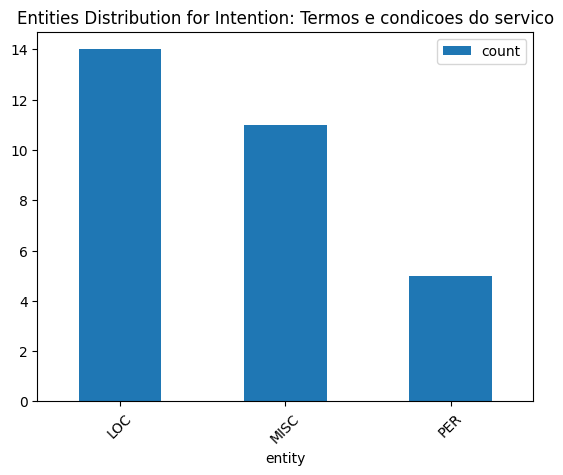

In [33]:
entity_answer_df = token_answer_df[token_answer_df['entities'].notna()]
entity_answer_df['entity'] = entity_answer_df['entities']
entity_intention_counts_answ = entity_answer_df.groupby(['intention', 'entity']).size().reset_index(name='count')

for intention in entity_intention_counts_answ['intention'].unique():
    top_entities = entity_intention_counts_answ[entity_intention_counts_answ['intention'] == intention]
    top_entities.plot(kind='bar', x='entity', y='count', title=f'Entities Distribution for Intention: {intention}')
    plt.xticks(rotation=45)
    plt.show()

#### Entidades por Intenção nas respostas

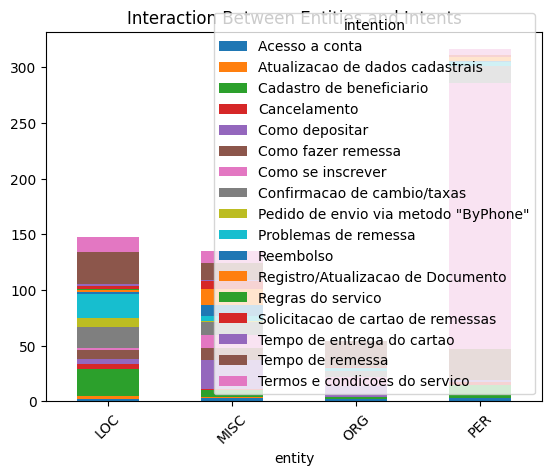

In [ ]:
entity_intent_answ_cf = pd.crosstab(entity_answer_df['entity'], entity_answer_df['intention'])
entity_intent_answ_cf.plot(kind='bar', stacked=True, rot=45)
plt.title('Interaction Between Entities and Intents')
plt.show()